In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("../csv/Consumo_cerveja.csv")

In [3]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [4]:
df.describe()

,Final de Semana,Consumo de cerveja (litros)
count,365.000000,365.000000
mean,0.284932,25.401367
std,0.452001,4.399143
min,0.000000,14.343000
25%,0.000000,22.008000
50%,0.000000,24.867000
75%,1.000000,28.631000
max,1.000000,37.937000


In [5]:
df.describe(include="O")

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm)
count,365,365,365,365,365
unique,365,277,110,151,93
top,2015-08-06,"22,76","18,2","27,2",0
freq,1,5,11,7,218


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [7]:
df.isna().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [8]:
df.isnull().any()

Data                           True
Temperatura Media (C)          True
Temperatura Minima (C)         True
Temperatura Maxima (C)         True
Precipitacao (mm)              True
Final de Semana                True
Consumo de cerveja (litros)    True
dtype: bool

In [9]:
#Drop rows with all NAN Values
df.dropna(how="all",inplace=True)

In [11]:
df.replace({',':'.'}, regex=True,inplace=True)

In [13]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [14]:
df["Data"] = pd.to_datetime(df["Data"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    object        
 2   Temperatura Minima (C)       365 non-null    object        
 3   Temperatura Maxima (C)       365 non-null    object        
 4   Precipitacao (mm)            365 non-null    object        
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [17]:
days=["Monday","Tueday","Wednesday","Thursday","Friday","Saturday","Sunday"]

In [18]:
df["Day"] = df["Data"].apply(lambda a:days[a.weekday()])

In [20]:
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461,Thursday
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972,Friday
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814,Saturday
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday
4,2015-01-05,23.82,21,28.3,0,0.0,28.900,Monday


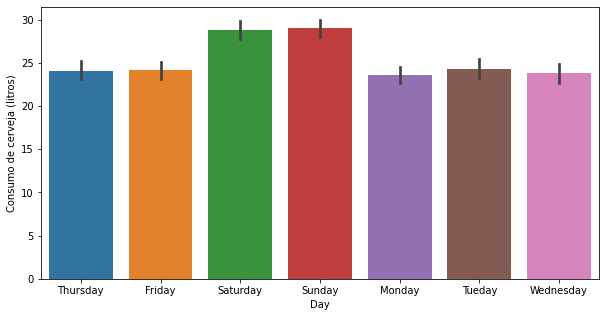

In [23]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Day", y="Consumo de cerveja (litros)", data=df)

In [24]:
df.drop(['Data',"Day"],axis=1,inplace=True)

In [25]:
beer_data = df.apply(pd.to_numeric)

In [26]:
beer_data

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...
360,24.00,21.1,28.2,13.6,1.0,32.307
361,22.64,21.1,26.7,0.0,0.0,26.095
362,21.68,20.3,24.1,10.3,0.0,22.309
363,21.38,19.3,22.4,6.3,0.0,20.467


In [27]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(6)
memory usage: 28.1 KB


In [29]:
x= beer_data.drop("Consumo de cerveja (litros)",axis=1)

In [30]:
y=beer_data["Consumo de cerveja (litros)"]

In [34]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
linear_reg=LinearRegression()

In [36]:
linear_reg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = linear_reg.predict(X_test)

In [38]:
linear_reg.score(X_test,y_test)

0.7427938181737361